# Author: Rushabh Kumbhani

# Task: Exploratory Data Analysis - Retail (Level-Beginner)

## Sub-Tasks: 

### 1) As a business manager, try to find out the weak areas where you can work to make more profit

### 2) What all business problems you can derive by exploring the data?


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# so that we dont have warnings while execution
from warnings import filterwarnings
filterwarnings('ignore')

# Columns Description

1) Ship Mode - Explains the mode of shipment wherein type of shipment whether first class, second class etc. is mentioned.

2) Segement - To which segment the product is being shipped whether it is consumer, cortporate etc.

3) Country - Product is shipped to which country

4) City - Product is shipped to which city

5) State - Product is shipped to which state

6) Postal Code - Postal code of the region where products need to be shipped 

7) Region - Product is to be shipped in which region like east,west,north etc.

8) Category - Category of the product to be shipped

9) Sub-Category - Sub-Category of the the category of the product to be shipped wherein we will have more precise idea of what product is shipped exactly

10) Sales - Sales of particular product shipped at particular place 

11) Quamtity - Quantity of the product sold. Here we can also have the idea of SP of the Product

12) Discount - Discount given on the particular product

13) Profit - Profit Obtained of selling of particular product wrt to its quantity. Here we can also have idea of CP of the Product

### Step-1 Read the Dataset and obtain basic information related to the Data

In [60]:
# Read Dataset

df=pd.read_csv(r'C:\Users\DELL\Desktop\TSF Tasks\Exploratory Data Analysis of Retail Sector/SampleSuperstore.csv',error_bad_lines=False)
df.head() #loads the first 5 values of the dataset

# r is used to convert the normal string to raw string

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [61]:
df.shape # returns the dimension of the dataset

(9994, 13)

In [62]:
df.dtypes # returns the type of variables present in each column 

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [64]:
df.describe() # describes the statistical data for the columns of type int and float

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [65]:
df.nunique() # displays the unique values in our dataset

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [66]:
df['Segment'].unique() # it will show us the unique values inside the column name

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

### Step-2 Check for the Null Values/Duplicate Values in the Dataset and remove them if any   

In [67]:
df.isna().sum() # checking if there are any null values in the dataset and getting sum of all the null values present

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### There are no Null values present in our Dataset!! Now we can look for Duplicate Data

In [68]:
df.duplicated().sum() # Check for all the duplicated data in our dataset

17

In [69]:
df.drop_duplicates() # Drops all the Duplicate values present in our dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Step-3 Check for the irrelevant columns which are not required in our dataset for drawing particular conclusion and drop them   

#### Here I have dropped Postal code column since it is not particularly required for drawing any conclusion given the columns city and region 

In [70]:
df1=df.drop(columns=['Postal Code'],axis=1) ### It will drop the column of Postal Code and inplace true means it will make changes in the dataframe as well
df1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Step-4 Check for relationship amongst the variables using correlation matrix and visulize it using heatmap to get an idea 

In [71]:
correlation=df1.corr()

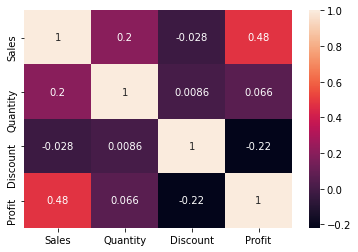

In [72]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

#### Here the correlation amongst the variables is very low so we won't rely on it and move forward with our analysis

### Step-5 Check for relationship amongst the variables using pairplot

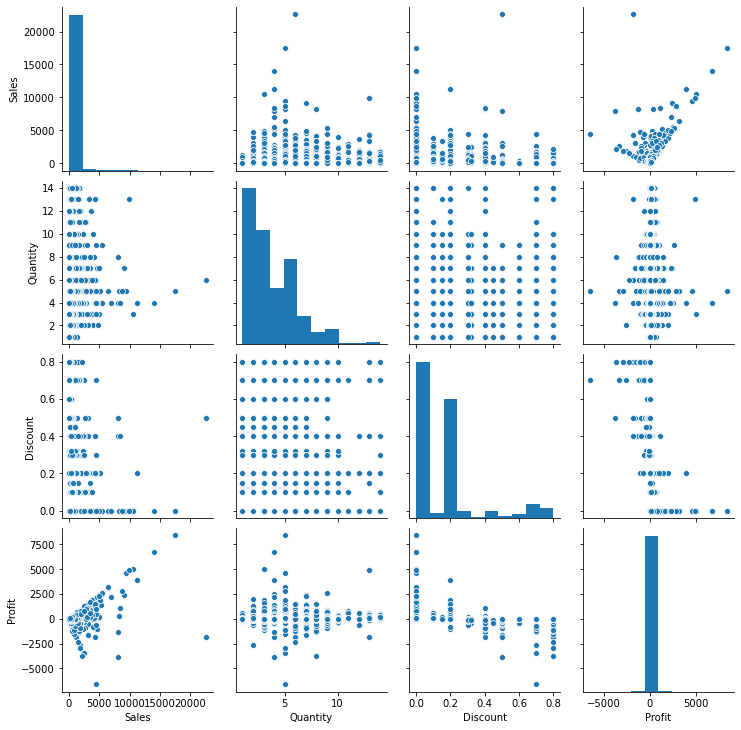

In [73]:
sns.pairplot(df1) # Show relationship between 2 varibles 

#### Here also since the plot is very scattered we are not able to derive anything so we'll move forward with analysis since there can be no particular conlcusion from the above plots

### Step-6 Try to examine relationship amongst the variables using the Scattered Plot 

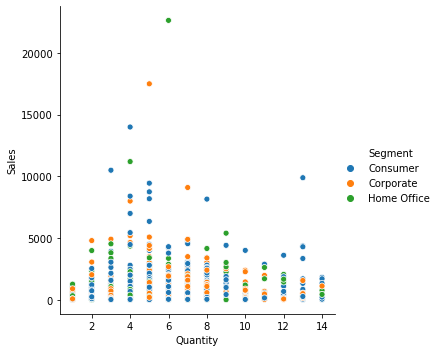

In [74]:
sns.relplot(x='Quantity', y='Sales', hue='Segment', data=df1)

#### Here we can have Brief idea about which segment generates more sales along with the quamtity required, but let's deep dive now into our analysis draw out some conclusion from them

### 1) Visualizing Segment of the Consumer buying from the SuperStore

In [75]:
df1['Segment'].value_counts() # counts the number of particular customer segements present in the dataset

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [76]:
# Calculating the percentage of particular segments present in the dataset

plt1 = df1['Segment'].value_counts()/len(df1['Segment']) * 100
plt1

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

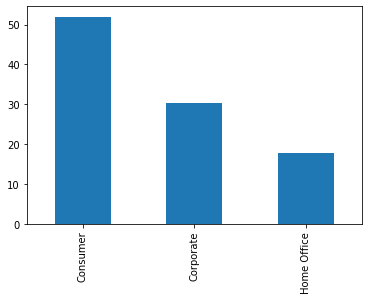

In [77]:
plt1.plot(kind='bar') # It plots the information obtained by normalizing our segement values 

#### Conclusion: It can be observed that more than 50% of the Customer segment is of Consumers, then corporate and then Home Office, So the Store owner should prioritize accoringly 

### 2) Analysing the Shipment Mode preffered by the Consumer

In [78]:
df1['Ship Mode'].value_counts() # counts the number of particular number of shipment modes opted as per the dataset

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [79]:
# Calculating the percentage of Shipment modes 

plt2 = df1['Ship Mode'].value_counts()/len(df1['Ship Mode']) * 100
plt2

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

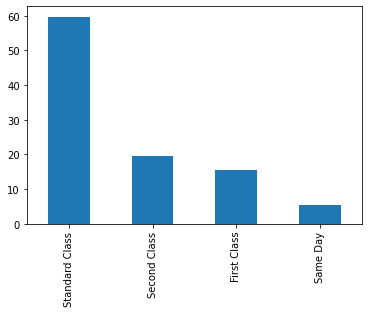

In [80]:
plt2.plot(kind="bar")

#### Conclusion: Around more than 50% of Customers opt for the Standard Shipment and however very few customers opt for the same day shipment, So logistical decisions and planning can be made accordingly

### 3) Analysing the category of items in the SuperStore

In [81]:
df1['Category'].value_counts()  # counts the number of particular number of categories according to the dataset

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [82]:
# Calculating the percentage of Categories present

plt3 = df1['Category'].value_counts()/len(df1['Category']) * 100
plt3

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

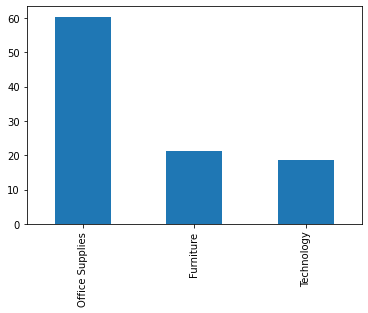

In [83]:
plt3.plot(kind="bar")

#### Conclusion: More than 60% of the products sold are in the category of office supplies, so owner need to make the inventory decisions accordingly

### 4) Analysing the Sub-Category of items in the SuperStore

In [84]:
df1['Sub-Category'].value_counts() # counts the number of particular number of sub categories according to the dataset

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [85]:
# Calculating the percentage of Sub Categories present

plt4 = df1['Sub-Category'].value_counts()/len(df1['Sub-Category']) * 100
plt4

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

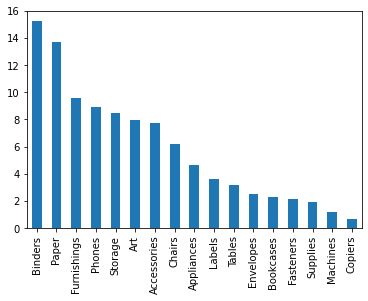

In [86]:
plt4.plot(kind="bar")

#### Conclusion: Items sold in terms of percentage along with the bars is given here, so owner needs to make the inventory decisions accordingly

### 5) Analysing the Profits as per the Customer Segments in the SuperStore

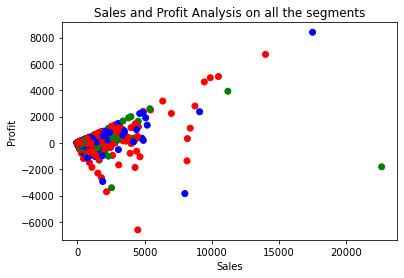

In [87]:
fig, ax = plt.subplots()
colors = {'Consumer':'Red', 'Corporate':'Blue', 'Home Office':'Green'}
ax.scatter(x=df['Sales'], y=df['Profit'], c=df['Segment'].apply(lambda x: colors[x])) # Scatter plot of different customer segments along with their sales and profit
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales and Profit Analysis on all the segments")
plt.show()

#### Conclusion: Here we can derive from this Scatter plot that most of the profit comes from the consumer segement, so they should focus of satisfying as many needs of consumer segment as possible 

### 6) Profit and Discount relationship using frequency plot in order to determine Discount amount Maximizing Profit 

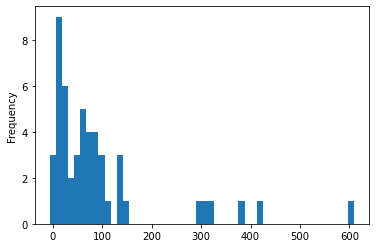

In [88]:
df2=df1.loc[(df['Segment']=='Consumer')&(df['Discount']==0.1)] # If the discount is 10%
df2['Profit'].plot.hist(bins=50)

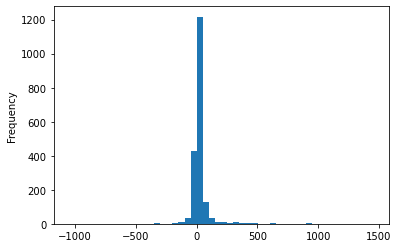

In [89]:
df2=df1.loc[(df['Segment']=='Consumer')&(df['Discount']==0.2)] # If the discount is 20%
df2['Profit'].plot.hist(bins=50)

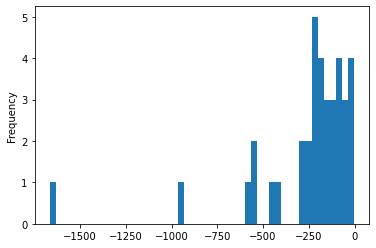

In [90]:
df2=df1.loc[(df['Segment']=='Consumer')&(df['Discount']==0.5)] # If the discount is 50%
df2['Profit'].plot.hist(bins=50)

#### Conclusion: We can easily see that on plotting profit with various values of discounts, max. profit obtained is at discount value about 10%, so store owner can't really afford to give discount more than 10% to the Consumer

### 7) Overall Average Profit mapping with the Segment given the different values of Discounts

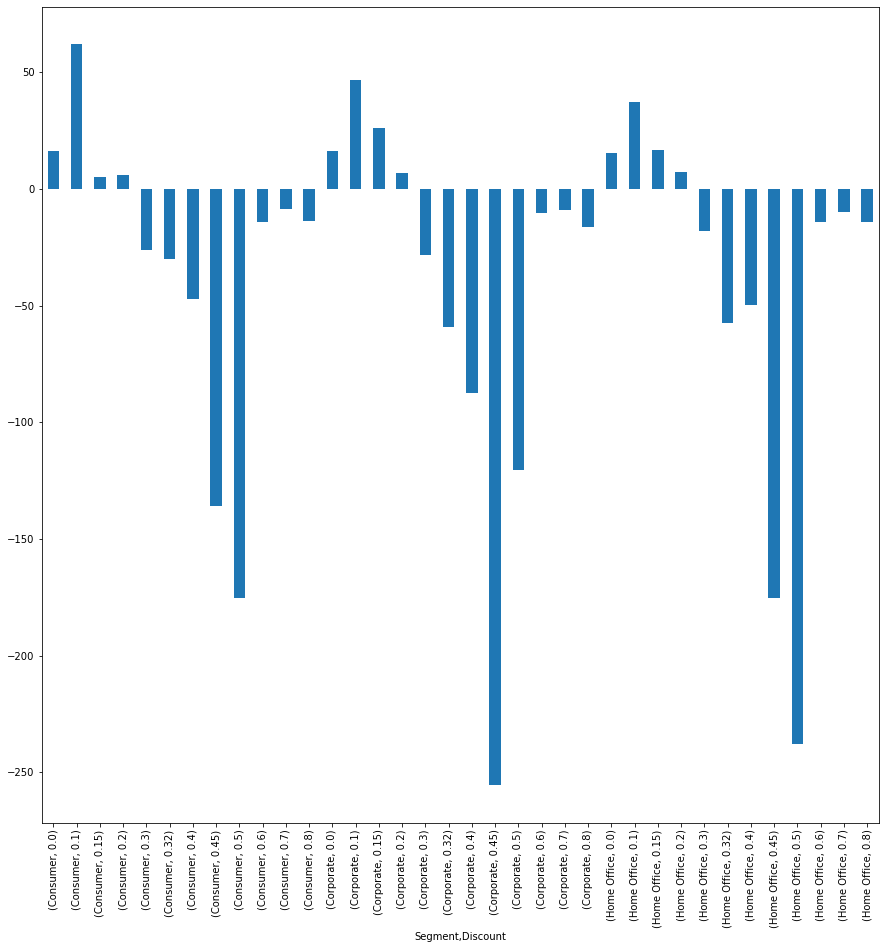

In [91]:
df3=df1.groupby(['Segment','Discount']).Profit.median()
df3.plot(kind='bar', stacked=True, figsize=(15,15))

#### Conclusion: Here average profit in all the segments along with possible discount values is given to have a better understanding of the discount segment relation 

### 8) States where maximum sales have occured for the SuperStore in United States

Text(0.5, 0, 'No. of Instances of states in the whole dataset')

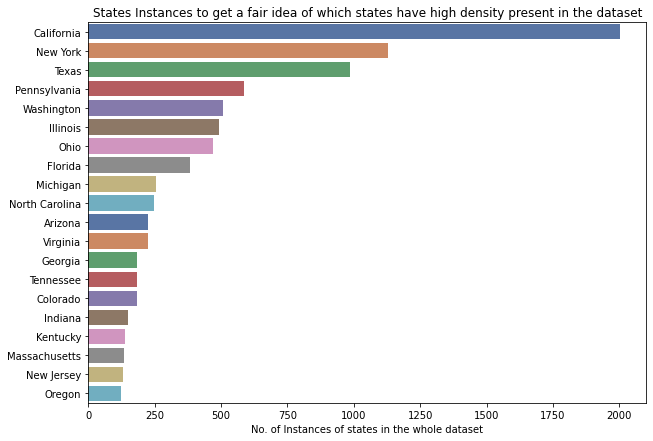

In [92]:
# Seaborn Library is used to plot this figure

plt.figure(figsize=(10,7))
states=df['State'].value_counts()[0:20] # Get the count of particular states mentioned in the whole column and sort it in descending order of top 20 states
sns.barplot(x=states,y=states.index,palette='deep')
plt.title("States Instances to get a fair idea of which states have high density present in the dataset")
plt.xlabel("No. of Instances of states in the whole dataset") 

#### Conclusion: Here the figure is self explanatory where one can determine in which staes maximum products are sold and top 20 states out of them are depicted here

### 9) Identifying the Sub Categories where maximum profit is obtained

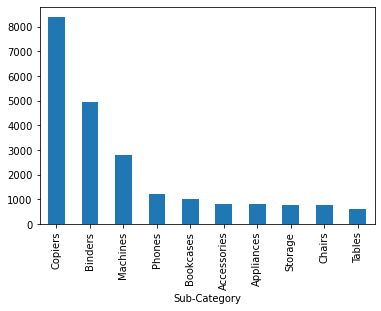

In [93]:
df.groupby('Sub-Category')['Profit'].max().nlargest(10).plot.bar() # Top 10 profit making sub-categories are shown here in the plot

#### Conclusion: Sub-Categories like copiers, binders etc. generate more profit than others, so Owner should really focus on selling and maintaining inventory of those 

### 10) Plotting Profit as per the sub categories

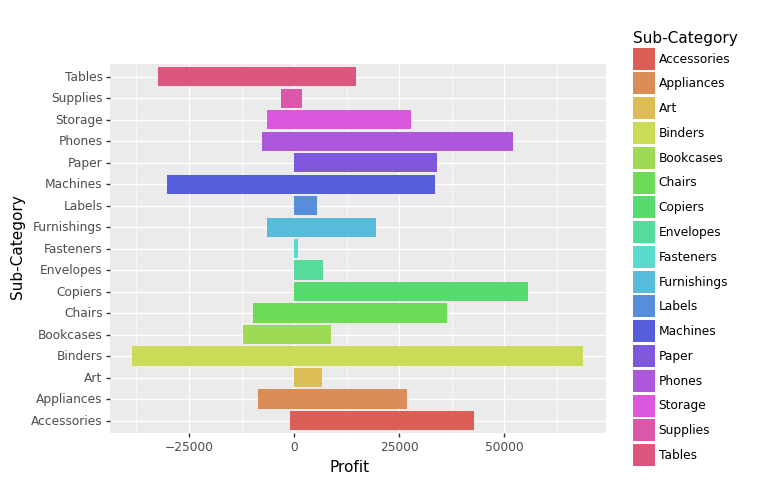

<ggplot: (120152630655)>

In [94]:
plt_5 = ggplot(df1, aes(x="Sub-Category", y="Profit", fill="Sub-Category")) + geom_col() + coord_flip() # Used ggplot library for plotting subcategory wise profit
display(plt_5)

#### Conclusion: Here Sub Category wise profit is shown leading owners to focus and improve on the relevant areas, Here binders have reported highest profit as well as loss, however loss can't be solely concluded because of the discounts given. Also copiers have the highest profit next to binders and it has no loss

### 11) Visualizing Shipment modes preffered according to the Category using Bar Graph 

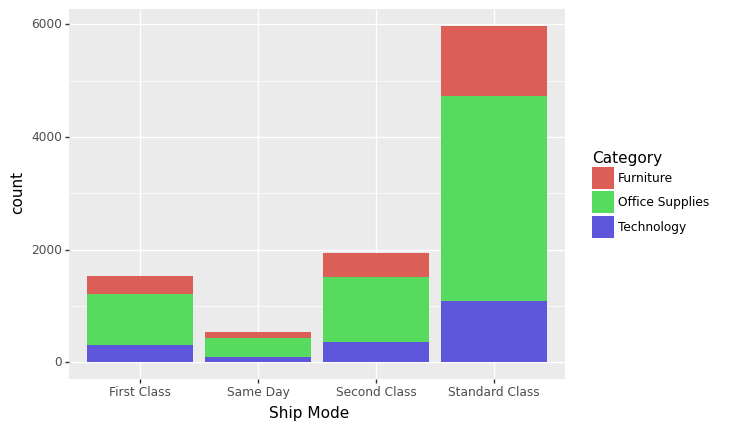

<ggplot: (120155573480)>

In [95]:
plt_6 = ggplot(df1, aes(x="Ship Mode", fill="Category")) + geom_bar(stat="count")
display(plt_6)

#### Conclusion: Here we can conclude that Majority of the people buying products of the category mentioned above will prefer standard class shipment 

### 12) Getting to know overall Sales data in the US according to the Sub-category in all the Segments as whole

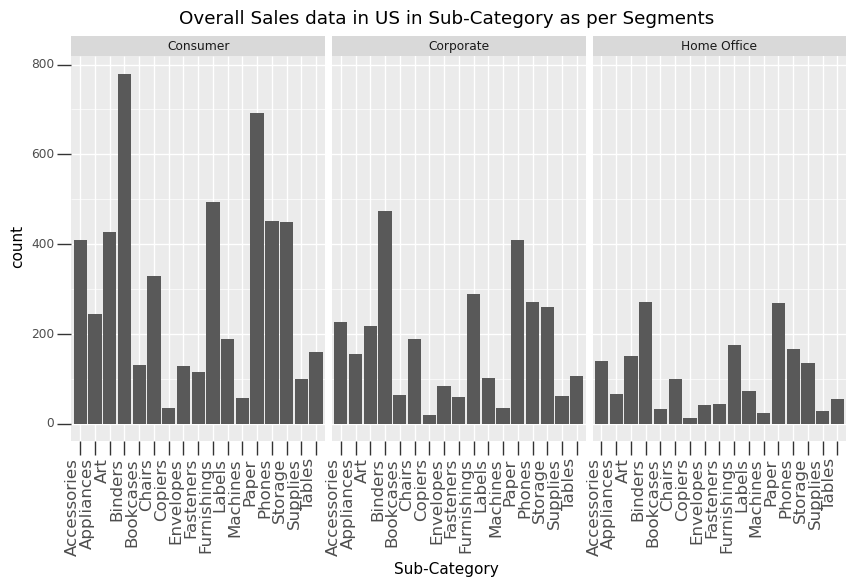

<ggplot: (120152630559)>

In [96]:
improvise_plot = theme(axis_text_x=element_text(angle=90, hjust=1), figure_size=(10,5), axis_ticks_length_major=10, axis_ticks_length_minor=5)
plt_7 = ggplot(df1, aes(x="Sub-Category", fill="Sales")) + geom_bar() + facet_wrap(['Segment']) + improvise_plot + theme(axis_text_x=element_text(size=12)) + ggtitle("Overall Sales data in US in Sub-Category as per Segments")
display(plt_7)

#### Conclusion: Here we can get overall sales idea of all the sub categories segement wise, It can be considered as an overview of our dataset

### 12) Visualising Profit and Discount relation using Line Plot

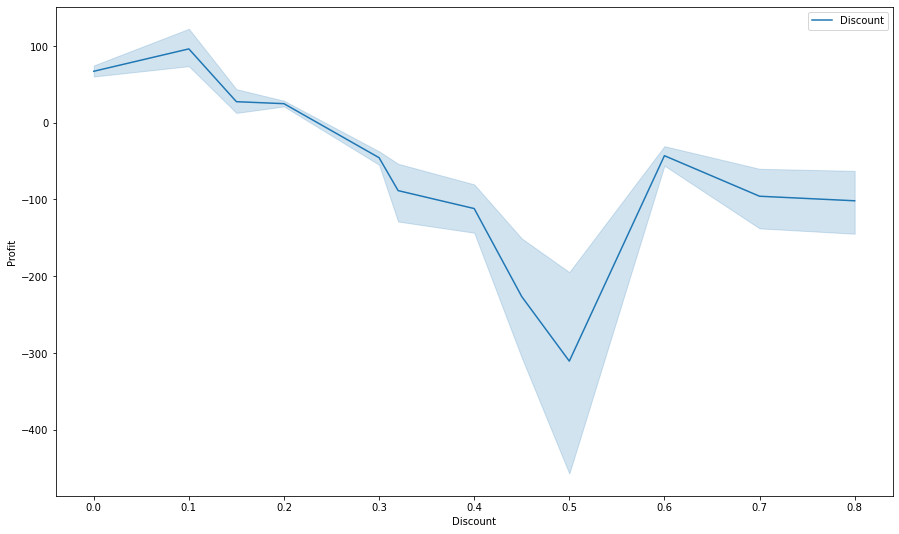

In [97]:
plt.figure(figsize=(15,9))
sns.lineplot('Discount','Profit', data=df1, label='Discount')
plt.legend()
plt.show()

#### Conclusion: Profit is only positive till the value of discount is less than 10%, after that it won't be feasible for the owner to sell items with discount greater than 10%

## Overall Conclusion: Using the Exploratory Data Analysis Techniques, we were able to make some Business Decisions that would have positive impact for the SuperStore, Also we were able to point out Drawbacks in the current working Business Model, where the owner can improve and turn it into a Profitable Venture with Good Customer and Logistics Base. 